In [419]:
import numpy as np 
import pandas as pd 
from sklearn.ensemble import RandomForestRegressor
import time 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow import keras
from sklearn.ensemble import RandomForestRegressor

Load the train and test datasets.
We dont need Id column so delete it.
Alley is mostly NaN values. So before going any deeper analysis remove the Alley column.
Store Saleprices in another numpy array.

In [1283]:
trainData = pd.read_csv("train.csv")
testData = pd.read_csv("test.csv")
trainPrices = trainData["SalePrice"].to_numpy()
print("Shapes are : ",trainData.shape,testData.shape)

Shapes are :  (1460, 81) (1459, 80)


In [1284]:
trainData.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [1285]:
trainData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

Remove the columns that has more nulls than non-nulls
Note : Maybe some of them are fillable

In [1286]:
del trainData["Id"],testData["Id"], 
del trainData["Alley"],testData["Alley"]
del trainData["PoolQC"],testData["PoolQC"]
del trainData["Fence"],testData["Fence"]
del trainData["MiscFeature"],testData["MiscFeature"]
del trainData["FireplaceQu"],testData["FireplaceQu"]

In [1287]:
trainData.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000


In [1288]:
trainData = pd.get_dummies(trainData)

In [1289]:
trainData.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


<AxesSubplot:>

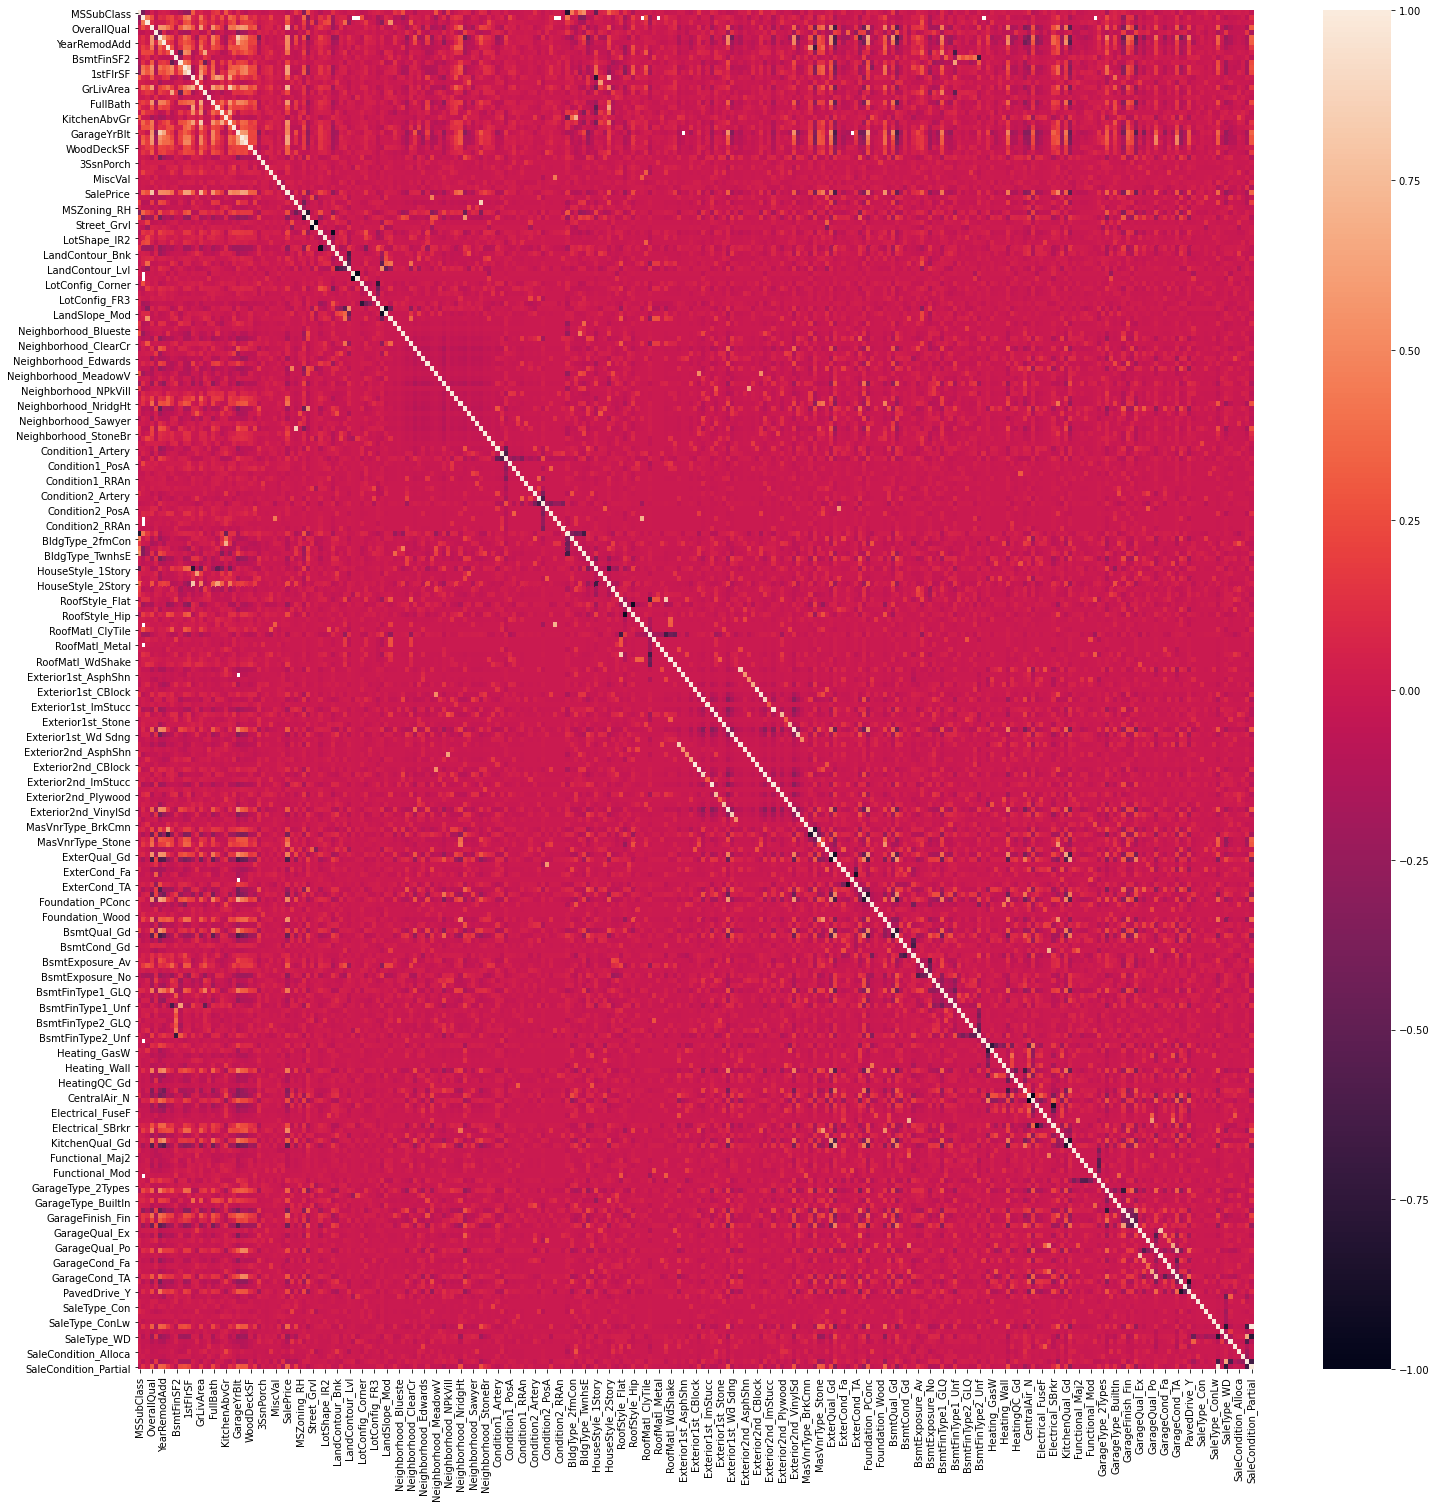

In [410]:
plt.figure(figsize=(25,25))
sns.heatmap(trainData.corr(),annot=False)

In [411]:
dropCols=trainData.columns[np.where((trainData.corr()["SalePrice"].to_numpy()[:-1]<0.1)&(trainData.corr()["SalePrice"].to_numpy()[:-1]>-0.1))]
trainData.drop(columns=dropCols,inplace=True)

In [1290]:
trainData.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,SaleType_ConLw,SaleType_New,SaleType_Oth,SaleType_WD,SaleCondition_Abnorml,SaleCondition_AdjLand,SaleCondition_Alloca,SaleCondition_Family,SaleCondition_Normal,SaleCondition_Partial
0,60,65.0,8450,7,5,2003,2003,196.0,706,0,...,0,0,0,1,0,0,0,0,1,0
1,20,80.0,9600,6,8,1976,1976,0.0,978,0,...,0,0,0,1,0,0,0,0,1,0
2,60,68.0,11250,7,5,2001,2002,162.0,486,0,...,0,0,0,1,0,0,0,0,1,0
3,70,60.0,9550,7,5,1915,1970,0.0,216,0,...,0,0,0,1,1,0,0,0,0,0
4,60,84.0,14260,8,5,2000,2000,350.0,655,0,...,0,0,0,1,0,0,0,0,1,0


In [1291]:
trainData.fillna(trainData.mean(),inplace=True)

<AxesSubplot:>

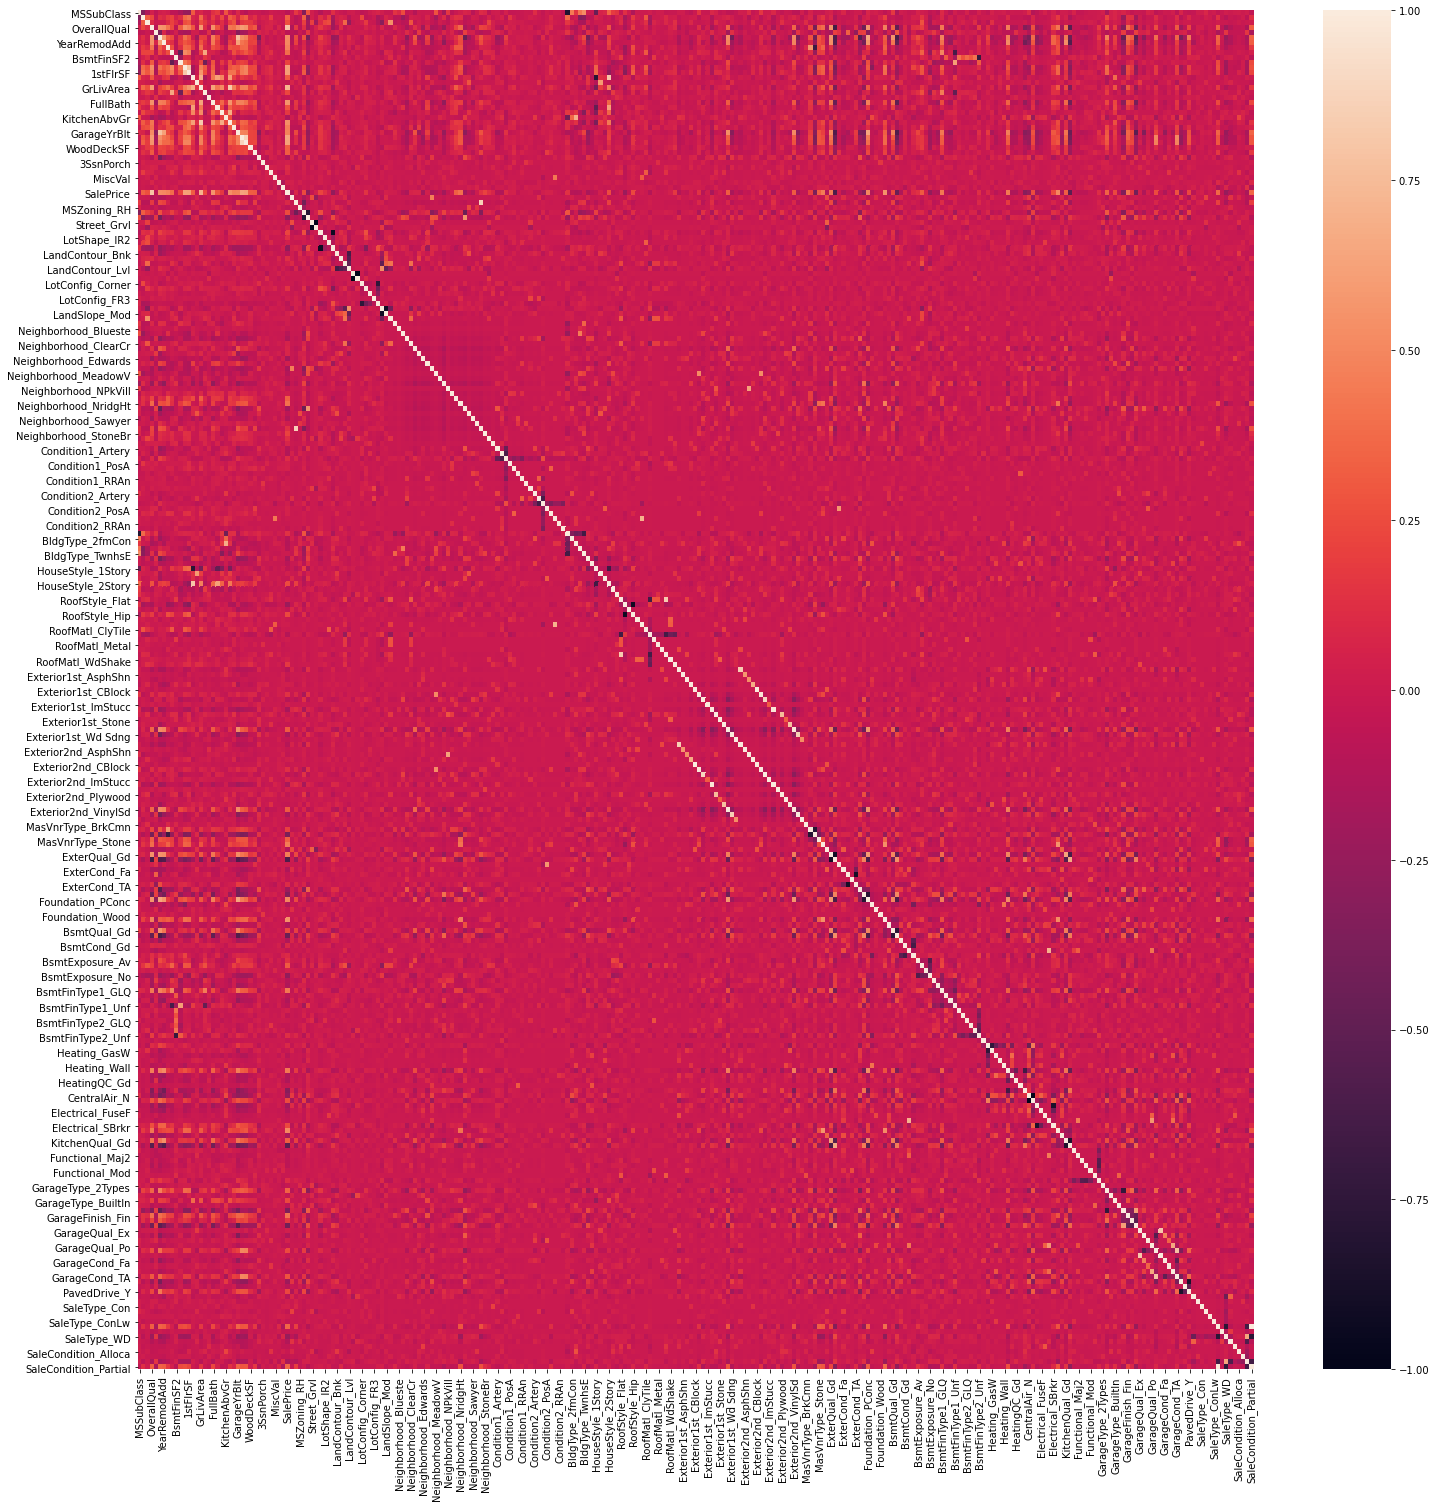

In [1292]:
plt.figure(figsize=(25,25))
sns.heatmap(trainData.corr(),annot=False)

In [1293]:
salePrices = trainData["SalePrice"].to_numpy()

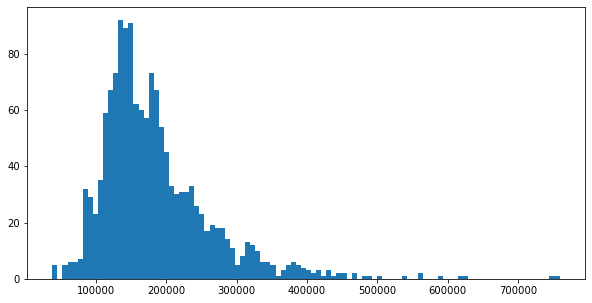

In [1294]:
hist,bins =np.histogram(salePrices,bins =100)
plt.figure(figsize=(10,5))
plt.bar(bins[1:],hist,width=(bins[1]-bins[0]))
plt.show()

In [1295]:
trainData.drop(np.where(salePrices>np.mean(salePrices)+np.std(salePrices))[0],inplace=True)

In [1296]:
salePrices=np.delete(salePrices,np.where(salePrices>np.mean(salePrices)+np.std(salePrices))[0],axis=0)

In [1297]:
trainData.shape

(1269, 271)

In [1298]:
def aencoder():
    inputLayer = keras.layers.Input(shape=(270))
    gNoise = keras.layers.GaussianNoise(0.05)(inputLayer)

    denseLayer = keras.layers.Dense(128)(gNoise)
    denseLayer = keras.layers.LeakyReLU()(denseLayer)
    denseLayer =keras.layers.BatchNormalization()(denseLayer)

    denseLayer = keras.layers.Dense(64)(denseLayer)
    denseLayer = keras.layers.LeakyReLU()(denseLayer)
    denseLayer =keras.layers.BatchNormalization()(denseLayer)

    encodeLayer = keras.layers.Dense(16)(denseLayer)
    encodeLayer = keras.layers.LeakyReLU()(encodeLayer)
    denseLayer =keras.layers.BatchNormalization()(encodeLayer)
    
    denseLayer = keras.layers.Dense(64)(denseLayer)
    denseLayer = keras.layers.LeakyReLU()(denseLayer)
    denseLayer =keras.layers.BatchNormalization()(denseLayer)
    
    denseLayer = keras.layers.Dense(128)(denseLayer)
    denseLayer = keras.layers.LeakyReLU()(denseLayer)
    denseLayer =keras.layers.BatchNormalization()(denseLayer)

    denseLayer = keras.layers.Dense(270)(denseLayer)
    denseLayer = keras.layers.LeakyReLU()(denseLayer)
    denseLayer =keras.layers.BatchNormalization()(denseLayer)

    model = keras.models.Model(inputs=[inputLayer],outputs = [denseLayer])
    model.compile(optimizer = keras.optimizers.Adam(1e-3),loss = keras.losses.mae)

    encoder = keras.models.Model(inputs=[inputLayer],outputs = [encodeLayer])
    encoder.compile(optimizer = keras.optimizers.Adam(1e-3),loss = keras.losses.mae)

    return model,encoder

In [1299]:
model,encoderModel =aencoder()
model.summary()

Model: "model_88"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_50 (InputLayer)       [(None, 270)]             0         
                                                                 
 gaussian_noise_43 (Gaussian  (None, 270)              0         
 Noise)                                                          
                                                                 
 dense_290 (Dense)           (None, 128)               34688     
                                                                 
 leaky_re_lu_256 (LeakyReLU)  (None, 128)              0         
                                                                 
 batch_normalization_264 (Ba  (None, 128)              512       
 tchNormalization)                                               
                                                                 
 dense_291 (Dense)           (None, 64)                825

In [1300]:
model.fit(normTrain,normTrain,epochs =250 ,verbose =1,validation_split = 0.1)

Epoch 1/250
40/40 [==============================] - 1s 4ms/step - loss: 0.8157 - val_loss: 0.2169
Epoch 2/250
40/40 [==============================] - 0s 2ms/step - loss: 0.6132 - val_loss: 0.2019
Epoch 3/250
40/40 [==============================] - 0s 2ms/step - loss: 0.4596 - val_loss: 0.1618
Epoch 4/250
40/40 [==============================] - 0s 2ms/step - loss: 0.3935 - val_loss: 0.1581
Epoch 5/250
40/40 [==============================] - 0s 2ms/step - loss: 0.3469 - val_loss: 0.1476
Epoch 6/250
40/40 [==============================] - 0s 2ms/step - loss: 0.3286 - val_loss: 0.1526
Epoch 7/250
40/40 [==============================] - 0s 2ms/step - loss: 0.3176 - val_loss: 0.1284
Epoch 8/250
40/40 [==============================] - 0s 2ms/step - loss: 0.3029 - val_loss: 0.1551
Epoch 9/250
40/40 [==============================] - 0s 2ms/step - loss: 0.2786 - val_loss: 0.1647
Epoch 10/250
40/40 [==============================] - 0s 2ms/step - loss: 0.2718 - val_loss: 0.2057
Epoch 11/

In [1301]:
outpp = encoderModel.predict(normTrain)

<AxesSubplot:>

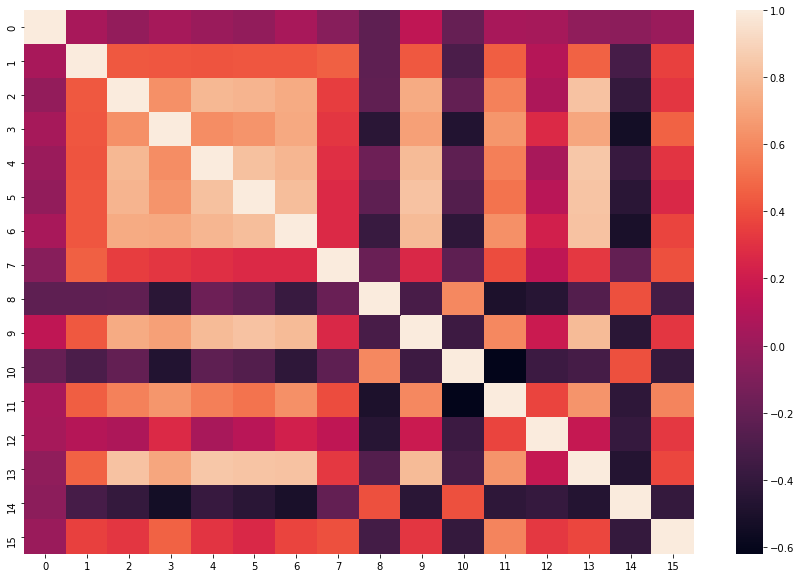

In [1302]:
corrMatrix = np.corrcoef(outpp,rowvar = False)
plt.figure(figsize = (15,10))
sns.heatmap(corrMatrix,annot = False)

In [1303]:
trainDf = trainData.copy()
salePrices = trainDf["SalePrice"].to_numpy()
del trainDf["SalePrice"]

In [1304]:
trainArr = trainDf.to_numpy()
xTrain = trainArr[:int(trainArr.shape[0]*0.9)]
yTrain =salePrices[:int(salePrices.shape[0]*0.9)]

xTest =trainArr[int(trainArr.shape[0]*0.9):]
yTest =salePrices[int(salePrices.shape[0]*0.9):]

In [1305]:
normTrain = (trainArr-np.min(trainArr,axis=0))/(np.max(trainArr,axis=0)-np.min(trainArr,axis=0))

normxTrain=(xTrain-np.min(trainArr,axis=0))/(np.max(trainArr,axis=0)-np.min(trainArr,axis=0))
normxTest=(xTest-np.min(trainArr,axis=0))/(np.max(trainArr,axis=0)-np.min(trainArr,axis=0))

normyTrain = (yTrain-np.min(salePrices,axis=0))/(np.max(salePrices,axis=0)-np.min(salePrices,axis=0))
normyTest = (yTest-np.min(salePrices,axis=0))/(np.max(salePrices,axis=0)-np.min(salePrices,axis=0))

<ipython-input-1305-d5695cd5882c>:1: RuntimeWarning: invalid value encountered in true_divide
  normTrain = (trainArr-np.min(trainArr,axis=0))/(np.max(trainArr,axis=0)-np.min(trainArr,axis=0))
<ipython-input-1305-d5695cd5882c>:3: RuntimeWarning: invalid value encountered in true_divide
  normxTrain=(xTrain-np.min(trainArr,axis=0))/(np.max(trainArr,axis=0)-np.min(trainArr,axis=0))
<ipython-input-1305-d5695cd5882c>:4: RuntimeWarning: invalid value encountered in true_divide
  normxTest=(xTest-np.min(trainArr,axis=0))/(np.max(trainArr,axis=0)-np.min(trainArr,axis=0))


In [1306]:
outppTest= outpp[int(trainArr.shape[0]*0.9):]
outpp = outpp[:int(trainArr.shape[0]*0.9)]

In [1307]:
forModel = RandomForestRegressor(max_depth=25)
forModel.fit(outpp, normyTrain)

RandomForestRegressor(max_depth=25)

In [1308]:
forModel.score(outppTest,normyTest)

ValueError: Found input variables with inconsistent numbers of samples: [127, 255]

In [1274]:
testPreds=forModel.predict(outppTest)

In [1275]:
testPreds = (testPreds * (np.max(salePrices,axis=0)-np.min(salePrices,axis=0))) + np.min(salePrices,axis=0)

In [1276]:
m = tf.keras.metrics.RootMeanSquaredError()
m.reset_state()
m.update_state(np.log(yTest),np.log(testPreds))
m.result().numpy()

0.18010744

In [1277]:
outputs = encoderModel.predict(normTrain)

In [1278]:
hist,bins=np.histogram(outputs[:,0],bins=100)

<BarContainer object of 99 artists>

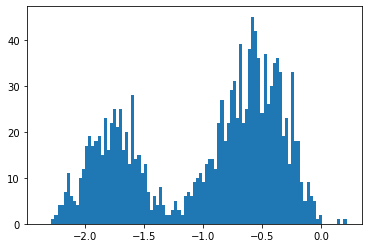

In [1279]:
plt.yscale("linear")
plt.bar(bins[2:],hist[1:],width=(bins[1]-bins[0]))

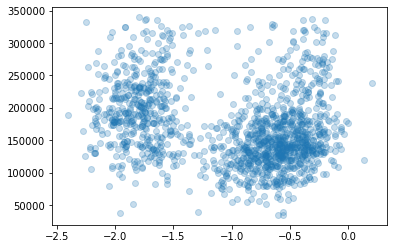

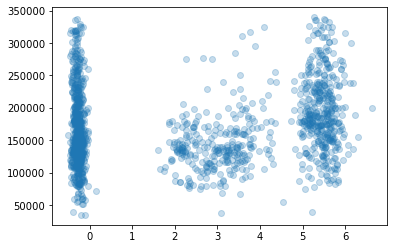

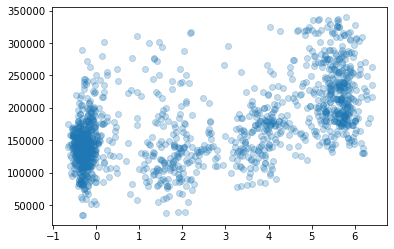

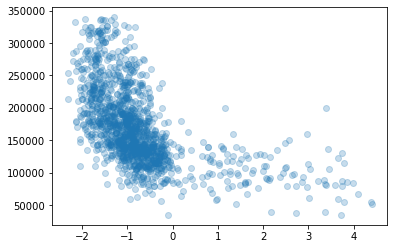

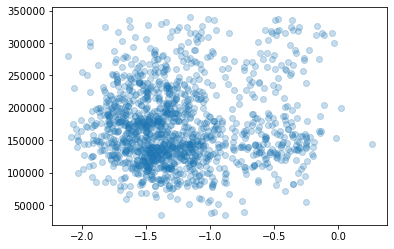

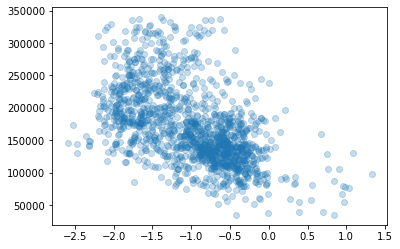

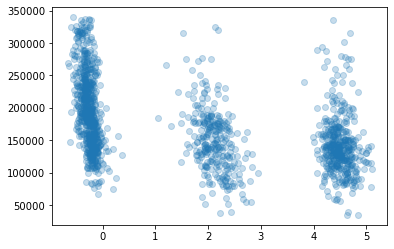

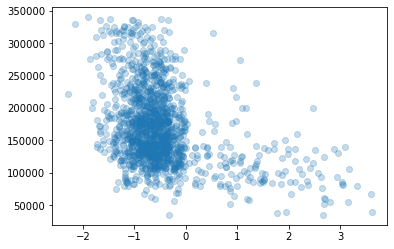

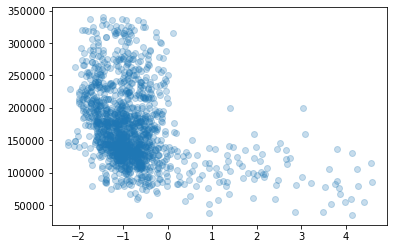

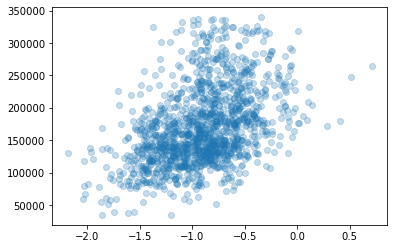

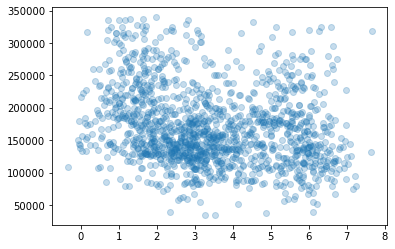

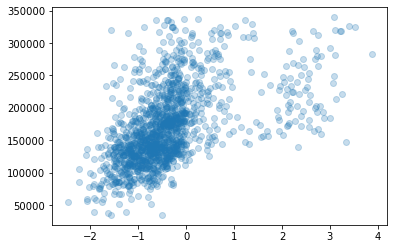

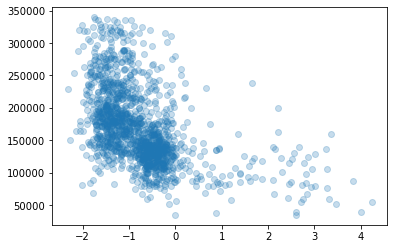

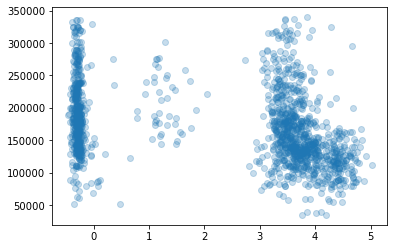

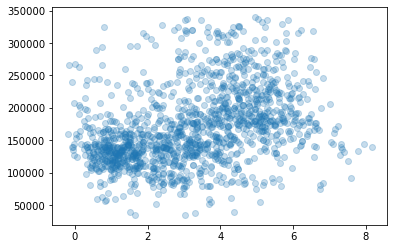

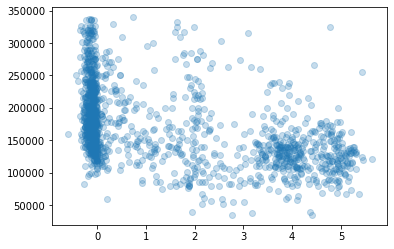

In [1280]:
for i in range(outputs.shape[1]):
    plt.scatter(outputs[:,i],salePrices,alpha=0.25)
    plt.show()